NEEDED
- reference (here Salmo salar)

PROGRAMS
- bowtie2
- pysam


## External reference

In [24]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

In [2]:
salmo_FASTA = '/home/ipseg/Data/salmo/Ssa_ASM_3.6.fasta'

build bowtie2 index
 - printed because this take ~2 hours to run

In [3]:
print('bowtie2-build {} salmo'.format(salmo_FASTA))

bowtie2-build /home/ipseg/Data/salmo/Ssa_ASM_3.6.fasta salmo


## internal reference

In [6]:
chum_ref = '/media/Shared/Data/chum/populations/ref/paper_1/chum_paper_1_ref.CURATED.fasta'

## Align

In [7]:
SAM_output = '/home/ipseg/Desktop/waples/chum_populations/results/batch_4/synteny/to_salmo.SAM'

In [153]:
print('bowtie2 -f --end-to-end --sensitive -p 4 -x /home/ipseg/Data/salmo/salmo -U {} -S {}'.format(chum_ref, SAM_output))

bowtie2 -f --end-to-end --sensitive -p 4 -x /home/ipseg/Data/salmo/salmo -U /media/Shared/Data/chum/populations/ref/paper_1/chum_paper_1_ref.CURATED.fasta -S /home/ipseg/Desktop/waples/chum_populations/results/batch_4/synteny/to_salmo.SAM


## Examine alignments

### Reference genome (Salmo salar)

In [49]:
ref = pysam.FastaFile(salmo_FASTA)

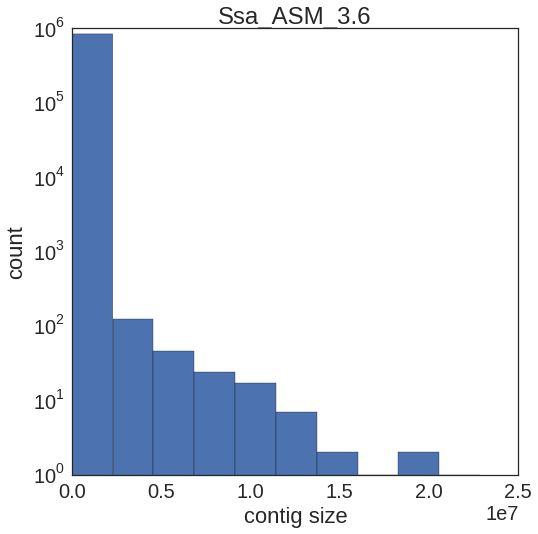

In [67]:
figsize(8,8)
plt.hist([ln for ln in ref.lengths])
plt.yscale('log', basey=10)
plt.ylabel('count')
plt.xlabel('contig size')
plt.title('Ssa_ASM_3.6')
plt.show()

#### Alignments to salmo

    

In [154]:
def get_aligns():
    return(pysam.AlignmentFile(SAM_output, "r").fetch())

In [155]:
mpqs  = [read.mapping_quality for read in get_aligns()]

Looks like we have three types of alignments
    - spurious (MP < 2)
    - moderate support (10 < MP < 28)
    - strong support (MP > 30)

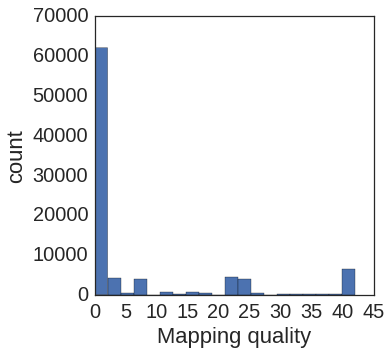

In [157]:
plt.hist(mpqs, bins = 20)
plt.xlabel('Mapping quality')
plt.ylabel('count')
plt.title('')
plt.show()

In [158]:
flags  = [read.flag for read in get_aligns()]

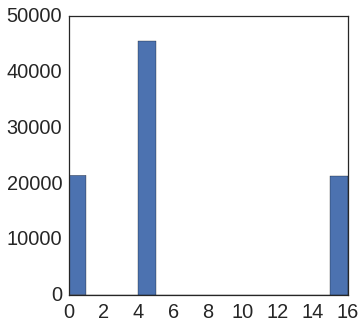

In [159]:
figsize(5,5)
plt.hist(flags, bins = 16)
plt.show()

(array([     0.,      0.,      0.,      0.,      0.,  88282.,      0.,
             0.,      0.,      0.]),
 array([ 92.5,  92.6,  92.7,  92.8,  92.9,  93. ,  93.1,  93.2,  93.3,
         93.4,  93.5]),
 <a list of 10 Patch objects>)

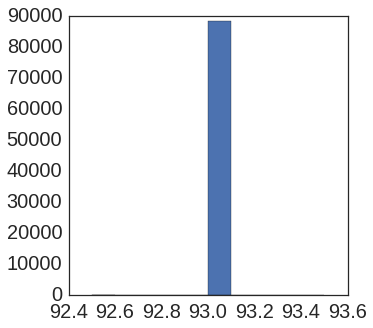

In [160]:
qal =  [read.query_alignment_length for read in get_aligns()]
plt.hist(qal)

In [161]:
edit_ditances = list()
mq = list()
for read in get_aligns():
    try:
        edit_ditances.append(np.int(read.get_tag('XM')))
        mq.append(np.int(read.mapping_quality))
    except KeyError:
        pass

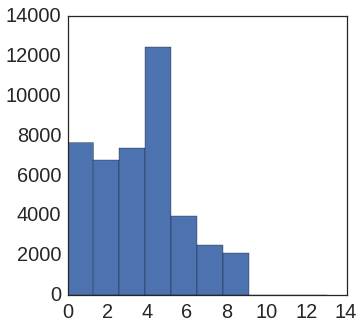

In [162]:
plt.hist(edit_ditances)
plt.show()

In [163]:
rr = pd.DataFrame({'ed': edit_ditances, 
              'mq': mq })

Edit distance does not tell the whole story. Low edit distances (<5) can result in a range of mapping qualities.

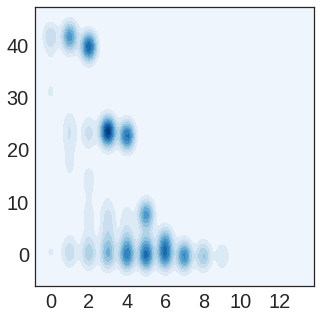

In [164]:
sns.kdeplot(rr, cmap="Blues", shade = True, legend = True)
plt.show()

Which contigs are getting alignments?

NotImplementedError: pileup of samfiles not implemented yet